# IS318 - Machine Learning
## TP2 - Linear classification

The goal of this TP is to experiment with linear models for classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

### 1. Dataset

We will work with a synthetic binary classification dataset:

(500, 2) (500,)


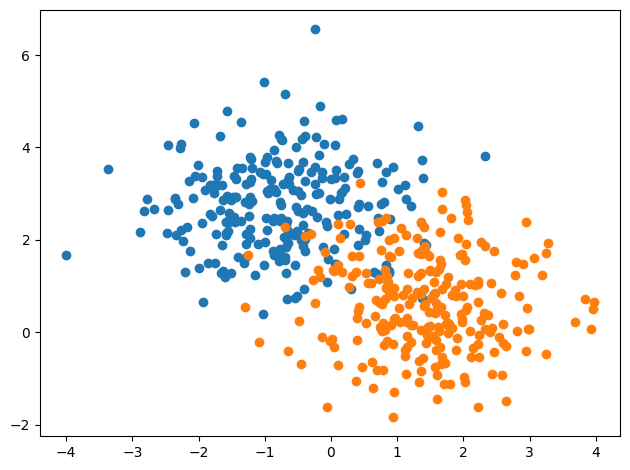

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, center_box=(-3, 3), random_state=42) # Easy
# X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2) # Harder
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.tight_layout()
print(X.shape, y.shape)

Before implementing a classification method, we will apply some preprocessing steps.

**(Question)** Preprocessing: normalize the data such that it has zero mean and unit variance. To do that, for each feature, substract the mean and divide by the standard deviation over the samples. Plot the data.

This procedure is called *standardization*.
It is useful for numerical stability (notably for gradient descent).

In [3]:
# YOUR CODE HERE

N = len(X)

x1_mean = np.mean(X[:,0])
x2_mean = np.mean(X[:,1])

x1_std = np.std(X[:,0])
x2_std = np.std(X[:,1])

X[:,0] = X[:,0] - x1_mean
X[:,1] = X[:,1] - x2_mean

X[:,0] = X[:,0]/x1_std
X[:,1] = X[:,1]/x2_std 

print(X[0])

[-1.07276255  0.58380325]


In [4]:
assert np.allclose(X.mean(axis=0), 0.)
assert np.allclose(X.var(axis=0), 1.)

**(Question)** Plot the data points as above to observe the difference of standardization.

(500, 2) (500,)


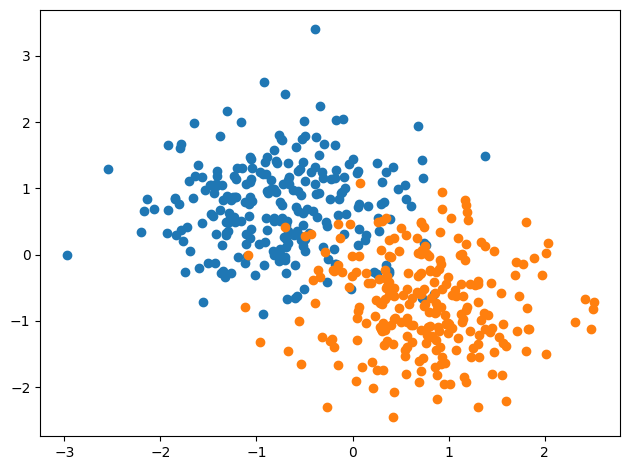

In [5]:
# YOUR CODE HERE
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.tight_layout()
print(X.shape, y.shape)

**(Question)** As usual, add a column with ones to simplify dot product notation. Then, split the dataset into training and validation sets.

In [6]:
# YOUR CODE HERE
X = np.column_stack((np.ones(N), X))
splitting_values = np.random.rand(N)

mask = splitting_values <= 0.75

X_train = X[mask]
y_train = y[mask]

X_valid = X[~mask]
y_valid = y[~mask]


In [7]:
assert X.shape[1] == 3
assert np.all(X[:, 0] == 1.)

**(Question)** With real data, it is considered wrong to apply standardization before splitting the dataset. Can you explain why?

The reason why standardization should be applied before splitting the dataset is to avoid having two different standardizations for each dataset separately, the goal is to standardize all of the data with the same mean and std values.

### 2. Logistic regression

**(Question)** Complete the `LogisticRegression` class below to implement logistic regression for binary classification.
- For the `fit` method, implement a simple gradient descent on the binary cross entropy loss. Record the evolution of the loss over the iterations in the `loss_hist` attribute.
- For the `predict` method, compute predictions from the model and return the binary decisions by thresholding at $0.5$.

In [8]:
class LogisticRegression():
    
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.loss_history = []
    
    def sigmoid(self, x):
        # YOUR CODE HERE
        return 1 / ( 1 + np.exp(-x))
        
    def binary_cross_entropy(self, y, y_pred):
        # YOUR CODE HERE
        Cost = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
        return np.sum(Cost)/len(y)
    
    def fit(self, X, y):
        # YOUR CODE HERE
        self.w = np.zeros(len(X[0]))
        for i in range(self.n_iters):
            dl_dw = 0
            dl_db = 0
            y_p, fw = self.predict(X)
            for j in range(len(X)):
                dl_dw += (y_p[j]-y[j])*X[j,1:]
                dl_db += (y_p[j]-y[j])
            dl_dw = dl_dw / len(X)
            dl_db = dl_db / len(X)
            dl_dtheta = [dl_db] + dl_dw.tolist()
            dl_dtheta = np.array(dl_dtheta)
            self.w = self.w - self.learning_rate*dl_dtheta
            y_p, f_w = self.predict(X)
            self.loss_history.append(self.binary_cross_entropy(y, f_w))
                        
    def predict(self, X):
        # YOUR CODE HERE
        Z = np.dot(X, self.w)
        f_w = self.sigmoid(Z)
        g_w = self.sigmoid(Z)
        f_w = f_w >= 0.5
        y_pred = 1 * f_w
        return y_pred, g_w
        

    def get_loss_history(self):
        return self.loss_history

**(Question)** Apply your logistic regression model with default arguments to our synthetic dataset. Report the classification accuracy on the training and validation sets.

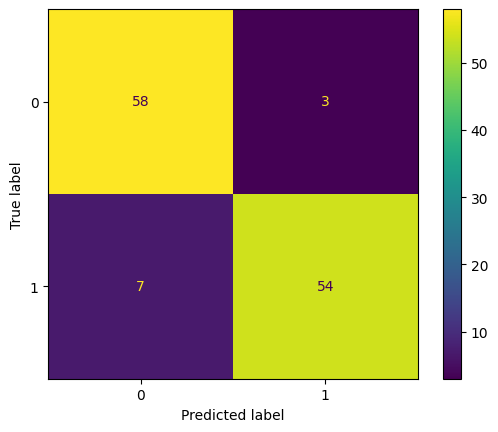

In [9]:
# YOUR CODE HERE
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_val_hat, f_w = logistic_model.predict(X_valid)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_val_hat, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

plt.show()

**(Question)** Plot the decision boundary on top on the data points.

*Hint*: to compute the decision boundary, start from its equation and transform it to an usual affine formulation.

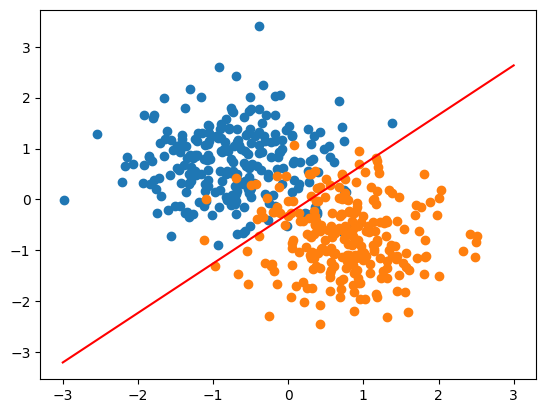

In [10]:
# YOUR CODE HERE

W = logistic_model.w
X1 = np.linspace(-3,3,50)
X2 = (-np.full(50, W[0])- X1*W[1])/W[2]

plt.plot(X1, X2, c='r')

plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0])
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1])


**(Question)** Play around with the `learning_rate` and `n_iters` hyperparameters to see the impact on gradient descent convergence.
Plot the evolution of the loss over the iterations for different learning rates.
Comment the results.

In [11]:
# YOUR CODE HERE

from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(learning_rate=0.5)
logistic_model.fit(X_train, y_train)
y_val_hat, f_w = logistic_model.predict(X_valid)
score = accuracy_score(y_val_hat, y_valid)

print(score)



0.9180327868852459


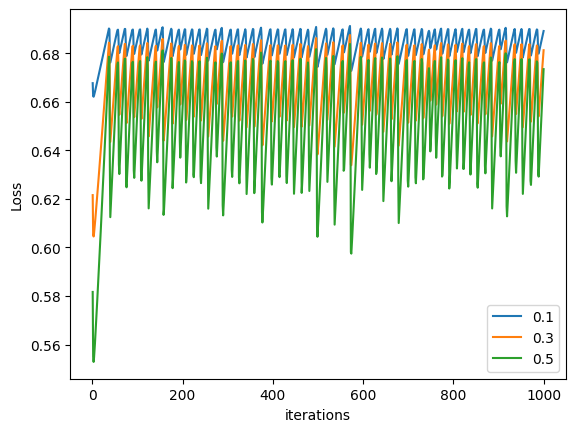

In [12]:
n_iterations = 1000
learning_rates = np.array([0.1, 0.3, 0.5])
iterations = np.arange(1, n_iterations+1)

for lr in learning_rates:
    log_model = LogisticRegression(learning_rate=lr, n_iters=n_iterations)
    log_model.fit(X_train, y_train)
    loss_history = log_model.loss_history
    plt.plot(iterations, loss_history)
    
plt.legend([str(lr) for lr in learning_rates])
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

YOUR ANSWER HERE

### 3. Gaussian generative model

**(Question)** Complete the `GaussianGenerativeModel` class below.

In [13]:
class GaussianGenerativeModel():

    def fit(self, X, y):
        # YOUR CODE HERE
        x_shape = X[0].shape
        self.mu_0 = np.zeros(x_shape)
        self.mu_1 = np.zeros(x_shape)
        self.phi = np.sum((y==1)*1)/len(y)
        self.cov = np.zeros((x_shape[0], x_shape[0]))
        
        class_0 = X[y==0]
        class_1 = X[y==1]
        
        for x in class_0:
            self.mu_0 += x
        for x in class_1:
            self.mu_1 += x
            
        self.mu_0 /= len(class_0)
        self.mu_1 /= len(class_1)
        

        for i,x in enumerate(X):
            std_vector = x-((self.mu_1*y[i]) + (self.mu_0*(1-y[i])))
            self.cov += std_vector.reshape(x_shape[0],1) @ std_vector.reshape(1,x_shape[0])
        self.cov /= len(y)
        
        
    def MultiGaussian(self, x, mean, cov):
        det_cov = np.linalg.det(cov)
        cov_inv = np.linalg.inv(cov)
        d = len(x)
        p = (1/np.sqrt(((2*np.pi)**d)*det_cov)) * np.exp((-1/2)*(x-mean).T @ cov_inv @ (x-mean))
        return p
        
    def predict(self, X):
        # YOUR CODE HERE
        P = np.zeros((len(X)))
        for i, x in enumerate(X):
            p_0 = self.MultiGaussian(x, self.mu_0, self.cov)*(1-self.phi)
            p_1 = self.MultiGaussian(x, self.mu_1, self.cov)*self.phi
            P[i] = 1 if p_1 >= p_0 else 0
        return P
            
            

**(Question)** Apply your gaussian generative model to our synthetic dataset. Report the classification accuracy on the training and validation sets.

*Hint:* The column with ones is not needed for this model.

In [14]:
# YOUR CODE HERE

genModel = GaussianGenerativeModel()
genModel.fit(X_train[:,1:], y_train)

y_val_hat = genModel.predict(X_valid[:,1:])
y_tr_hat = genModel.predict(X_train[:,1:])

v_score = accuracy_score(y_val_hat, y_valid)
t_score = accuracy_score(y_tr_hat, y_train)

print("Training accuracy : " + str(t_score))
print("Validation accuracy : " + str(v_score))

Training accuracy : 0.9470899470899471
Validation accuracy : 0.9180327868852459


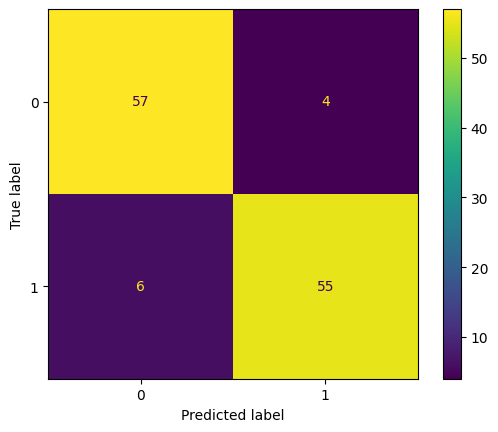

In [15]:
cm = confusion_matrix(y_valid, y_val_hat, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

plt.show()

**(Question)** Plot the decision boundary on top on the data points and compare it with the one obtained with logistic regression.

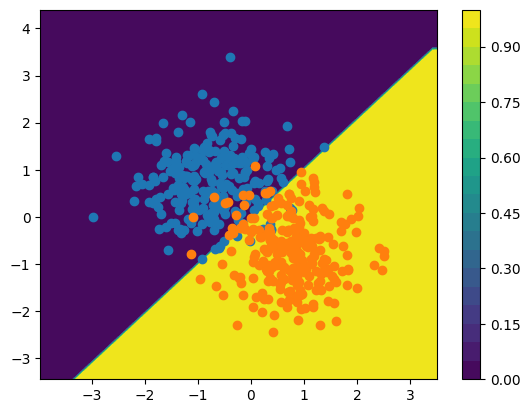

In [16]:
# YOUR CODE HERE

X0  = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, 100)
Y0 = np.linspace(np.min(X[:,2])-1, np.max(X[:,2])+1, 100)

X_m, Y_m = np.meshgrid(X0, Y0)

D = np.column_stack((X_m.ravel(), Y_m.ravel()))

Z = genModel.predict(D).reshape(X_m.shape)

plt.contourf(X_m, Y_m, Z, 20, cmap='viridis')
plt.colorbar()

plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0])
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1])


The decision boundary of the generative model we implemented is strongly similar to the one we obtained with our logistic regression model.

### 4. Comparison with `sklearn`

**(Question)** Apply logistic regression using the `LogisticRegression` class from the `scikit-learn` library. Compare the results with your previous implementation.

*Hints:*
- If your features are already augmented with a column of ones, set the `fit_intercept` parameter to `False`
- Set `penalty` (regularization to `None` to match your unregularized implementation

/home/faroukso/2A/s8/DeepLearning/mldl/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training accuracy : 0.9444444444444444
Validation accuracy : 0.9180327868852459


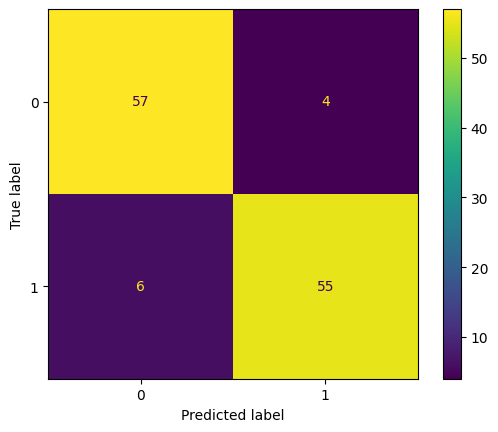

In [17]:
from sklearn.linear_model import LogisticRegression as LogisticRegressionSklearn
# YOUR CODE HERE

skl_model = LogisticRegressionSklearn(penalty='none', fit_intercept=False)
skl_model.fit(X_train, y_train)

y_tr_hat = skl_model.predict(X_train)
y_val_hat = skl_model.predict(X_valid)


v_score = accuracy_score(y_val_hat , y_valid)
t_score = accuracy_score(y_tr_hat, y_train)

print("Training accuracy : " + str(t_score))
print("Validation accuracy : " + str(v_score))


cm = confusion_matrix(y_valid, y_val_hat, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

plt.show()



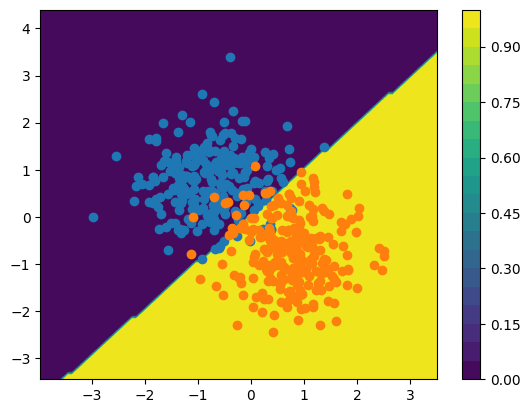

In [18]:
X0  = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, 100)
Y0 = np.linspace(np.min(X[:,2])-1, np.max(X[:,2])+1, 100)

X_m, Y_m = np.meshgrid(X0, Y0)

D = np.column_stack((X_m.ravel(), Y_m.ravel()))
D = np.column_stack((np.ones(len(D)), D))

Z = skl_model.predict(D).reshape(X_m.shape)

plt.contourf(X_m, Y_m, Z, 20, cmap='viridis')
plt.colorbar()

plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0])
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1])

We notice that the confusion matrix of sklearn's model is very close to the one of our previous model. We also notice that the accuracy is extremely similar between the two models (sklearn and our model). The decision boundary appears to be also very similar to the ones we obtained with both our models (logistic & generative).

### 5. Application to breast cancer dataset

In [19]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

**(Question)** Load the data into `X` and `y` variables. Familiarize yourself with this dataset. What are the dimensions? Explain what they mean.

In [20]:
# YOUR CODE HERE
print("X shape : " + str(X.shape))
print("y shape : " + str(y.shape))
print("X[0] = " + str(X[0]))
print("Classes : " + str(np.unique(y)))

X shape : (500, 3)
y shape : (500,)
X[0] = [ 1.         -1.07276255  0.58380325]
Classes : [0 1]


X is the dataset matrix, it contains 500 recordings and 2 features (the first column is just added to make computation easier).

y is the label vector, there are two possible classes 1 (positive) or 0 (negative).


The two features represent medical data.

**(Question)** Split into train/test and preprocess the data.

In [21]:
# YOUR CODE HERE

N = X.shape[0]

#Data split

splitting_values = np.random.rand(N)

mask = splitting_values <= 0.75

X_train = X[mask]
y_train = y[mask]

X_valid = X[~mask]
y_valid = y[~mask]

#Data pre-processing (normalization)

x1_mean = np.mean(X[:,1])
x2_mean = np.mean(X[:,2])

x1_std = np.std(X[:,1])
x2_std = np.std(X[:,2])

X[:,1] = X[:,1] - x1_mean
X[:,2] = X[:,2] - x2_mean

X[:,1] = X[:,1]/x1_std
X[:,2] = X[:,2]/x2_std 

**(Question)** Apply your implementations of logistic regression and gaussian generative model to this dataset.

In [29]:
# YOUR CODE HERE

logModel = LogisticRegression(learning_rate=0.5)

genModel = GaussianGenerativeModel()

logModel.fit(X_train, y_train)
genModel.fit(X_train[:,1:], y_train)


**(Question)** Apply cross-validation (see `sklearn.model_selection`) on your implementations to successively train several models and obtain predictions for the whole dataset.
Comment the results.

In [35]:
# YOUR CODE HERE

import sklearn.model_selection

gen_train_s = []
gen_val_s = []

log_train_s = []
log_val_s = []

kf = sklearn.model_selection.KFold()

for train, valid in kf.split(X_train):
    X_t, y_t = X_train[train], y_train[train]
    X_v, y_v = X_train[valid], y_train[valid]
    logModel.fit(X_t, y_t)
    genModel.fit(X_t[:,1:], y_t)
    
    y_log_tr_pred, f_w = logModel.predict(X_t)
    y_log_v_pred, f_w = logModel.predict(X_v)
    
    y_gen_tr_pred = genModel.predict(X_t[:,1:])
    y_gen_v_pred = genModel.predict(X_v[:,1:])
    
    t_gen_s = accuracy_score(y_gen_tr_pred, y_t)
    t_log_s = accuracy_score(y_log_tr_pred, y_t)
    v_gen_s = accuracy_score(y_gen_v_pred, y_v)
    v_log_s = accuracy_score(y_log_v_pred, y_v)
    
    
    gen_train_s.append(t_gen_s)
    gen_val_s.append(v_gen_s)
    
    log_train_s.append(t_log_s)
    log_val_s.append(v_log_s)

print("Logistic train scores : " + str(log_train_s))
print("Logistic valid scores : " + str(log_val_s))
print("Generative train scores : " + str(gen_train_s))
print("Generative valid scores : " + str(gen_val_s))
    
    


Logistic train scores : [0.9377162629757786, 0.9342560553633218, 0.8896551724137931, 0.9206896551724137, 0.8724137931034482]
Logistic valid scores : [0.9315068493150684, 0.958904109589041, 0.8333333333333334, 0.9722222222222222, 0.8888888888888888]
Generative train scores : [0.9307958477508651, 0.9307958477508651, 0.9310344827586207, 0.9241379310344827, 0.9448275862068966]
Generative valid scores : [0.9315068493150684, 0.9315068493150684, 0.9027777777777778, 0.9583333333333334, 0.8888888888888888]


YOUR ANSWER HERE